# Tasks Description

The laboratory measurement was carried out using two electrical circuits: a filter
RC low-pass filter and RLC bandpass filter. Their schematics and transmittances
are given in the figures below.  
  
For each filter, the input signal u(𝑡) and the output signal 𝑦(𝑡) were measured. The components
of each circuit have the following nominal values:
- RC circuit: 𝑅1 = 47 Ω, 𝐶1 = 2.2 μF.
- RLC circuit: 𝑅2 = 220 Ω, 𝐶2 = 4.7 nF and 𝐿2 = 1 mH
  
Identification of both circuits was carried out using chirp signal and noise. For
individual circuits, these signals had the following parameters:
- RC circuit:
    - chirp: frequency from 40 Hz to 150 kHz, signal length 2 seconds
    - noise: frequency up to 200 kHz, signal length 2 seconds
- RLC circuit:
    - chirp: frequency from 1 to 300 kHz, signal length 2 seconds
    - noise: frequency up to 500 kHz, signal length 2 seconds  
  
---

## Exercise 1
### Task 1.1 - Frequency Response Analysis Using Chirp Signal

Based on measurements with chirp excitation signals (datasets:  
📁 `20210305-RC_Chirp40v150kHz_T2s.csv`  
📁 `20220401-RLC_Chirp1v300kHz_T2s.csv`  
compute the **Bode plots** of the given filters and signals using the **frequency-domain transfer function**:

$$
H(\omega) = \frac{Y(\omega)}{U(\omega)}
$$

Where:  
$$
U(\omega) \text{ – Fourier transform of the input signal}
$$

$$
Y(\omega) \text{ – Fourier transform of the output signal}
$$

Comparison with Theoretical Model

Once the frequency response (H(omega)) is computed from the data, plot the Bode magnitude and phase characteristics, and compare them with the **theoretical Bode plots** obtained from the system’s transfer function using `scipy.signal.TransferFunction` and `bode()`.
  
  
### Task 1.2 – Improved Bode Plot with Corrected RLC Model

To improve the theoretical model and compensate for real-world nonidealities, update the **transfer function** of the RLC circuit by including the resistance of the inductor and other circuit components. The modified transfer function becomes:

$$
H(s) = \frac{Y(s)}{V(s)} = \frac{\frac{R_2}{L_2}}{s^2 + \frac{R_2 + R_{2L}}{L_2} s + \frac{1}{C_2 L_2}}
$$

Where:
- \( R2 \) – resistance of the resistor
- \( L2 \) – inductance of the coil
- \( C2 \) – capacitance of the ceramic capacitor
- \( R2L \) – **total parasitic resistance**, including:
  - the inductor’s internal resistance
  - resistance of wires and PCB traces  
  
Measurements and Parameter Estimation
  
1. Use a **multimeter** to measure:
   - \( R2 \): resistor value
   - \( C2 \): capacitor value
   - \( R2L \): resistance of the inductor + wiring

2. Use a **trial-and-error method** (within ±20% of nominal values) to estimate \( L_2 \) so that the theoretical Bode plot matches the empirical one as closely as possible.
  
  
---

## Exercise 2 – Transfer Function Estimation Using Elch Periodogram

An alternative method for estimating the transfer function is to use spectral estimators, such as the **H1 estimator**, via the `tfestimate` function. This function calculates the estimator H_1 using Welch's method (similar to power spectral density estimation).

The estimator is computed using:

$$
H_1(\omega) = \frac{G_{xy}(\omega)}{G_{xx}(\omega)}
$$

Where:

$$
G_{xx}(\omega) \text{– power spectral density of the input signal}
$$

$$
G_{xy}(\omega) \text{– cross-spectral density between output and input signals}
$$

### ⚙️ How `tfestimate` Works

- The algorithm divides the input signals into segments of length `window`.
- These windows can **overlap** by a number of samples defined by the variable `overlap`.
- For each segment, the cross and auto spectra are computed.
- The final transfer function estimate is obtained by **averaging** these values.

---
  
## Exercise 3
### Task 3 – Transfer Function Estimation Using Noise Excitation

Load the measurement data obtained using **noise signals**, provided in the following files:

📁 `20210305-RC_SzumBand200kHz_T2s.csv`  
📁 `20220401-RLC_SzumBand500kHz_T2.csv`  

### Task 3.1 – Frequency-Domain Transfer Function from Noise Data

Using the same method as in Task 1.1, compute the transfer function (H(omega)) for both RC and RLC filters based on noise-driven input/output data.

- For the RLC filter, use the **modified transfer function** from Task 1.2.
- Plot the **Bode diagrams** for the estimated transfer functions.
- Compare them to the theoretical Bode plots (from known system equations).
- Discuss the quality of estimation when using noise instead of chirp excitation.

### Task 3.2 – Transfer Function Estimation Using `tfestimate` and H1 Estimator

Apply the **`tfestimate` function** to compute the transfer function of both RC and RLC filters using the **H₁ estimator** based on the noise input/output data.

- Use three different values of the frequency resolution parameter `df`: **1**, **10**, and **100**.
- Adjust `window` and `overlap` accordingly for each value of `df` (typically: `overlap = 50% * window`).
- Plot the resulting Bode diagrams for each case.
- Compare the estimated responses to the **theoretical model** for both filters.
- Evaluate and discuss how different `df` values affect the frequency resolution and the noise in the estimated response.

---



## RC low-pass filter

<img src="RC.png"/>  

In [80]:
import control as ctrl

R1 = 47
C1 = 2.2e-6

num1 = [1 / (R1*C1)]
denom1 = [1, 1 / (R1*C1)]

G_s_RC = ctrl.TransferFunction(num1, denom1)
print(G_s_RC)

<TransferFunction>: sys[25]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  9671
--------
s + 9671



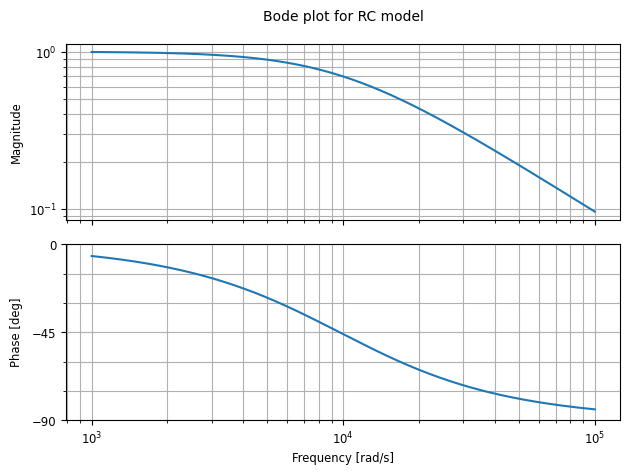

In [81]:
ctrl.bode(G_s_RC, title='Bode plot for RC model')

## RLC bandpass filter

<img src="RLC.png"/>  

In [82]:
R2 = 220
C2 = 4.7e-9
L2 = 1e-3

num2 = [R2 / L2, 0]
denom2 = [1, R2 / L2, 1 / (C2*L2)]

G_s_RLC = ctrl.TransferFunction(num2, denom2)
print(G_s_RLC)

<TransferFunction>: sys[27]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         2.2e+05 s
---------------------------
s^2 + 2.2e+05 s + 2.128e+11



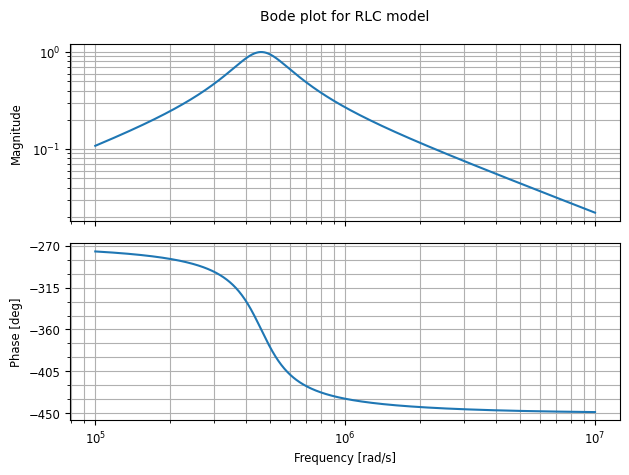

In [83]:
ctrl.bode(G_s_RLC, title='Bode plot for RLC model')

## Exercise 1

### Task 1.1

#### Load Chirp Data

In [84]:
import pandas as pd
import os
from pathlib import Path

DATA_DIR = Path(os.getcwd()) / 'data'

CHIRP1_DATA_PATH = DATA_DIR / '20210305-RC_Chirp40v150kHz_T2s.csv'
CHIRP2_DATA_PATH = DATA_DIR / '20220401-RLC_Chirp1v300kHz_T2s.csv'

RC_chirp_data = pd.read_csv(CHIRP1_DATA_PATH)
RLC_chirp_data = pd.read_csv(CHIRP2_DATA_PATH)

RC_chirp_data

C:\Users\miki0\AppData\Local\Temp\ipykernel_16852\1873587931.py:10: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  RC_chirp_data = pd.read_csv(CHIRP1_DATA_PATH)
C:\Users\miki0\AppData\Local\Temp\ipykernel_16852\1873587931.py:11: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  RLC_chirp_data = pd.read_csv(CHIRP2_DATA_PATH)


,Tstart,Tinterval,ExtraSamples,RequestedLength,Length,A,B,Version
0,-0.000002,1.000000e-06,0.0,2000000.0,2000000.0,-0.018006,0.224433,6
1,NaN,NaN,NaN,NaN,NaN,0.000000,0.206610,.
2,NaN,NaN,NaN,NaN,NaN,0.000000,0.224433,1
3,NaN,NaN,NaN,NaN,NaN,0.000000,0.224433,4
4,NaN,NaN,NaN,NaN,NaN,0.000000,0.224433,.
...,...,...,...,...,...,...,...,...
1999995,NaN,NaN,NaN,NaN,NaN,-0.432752,-0.257759,NaN
1999996,NaN,NaN,NaN,NaN,NaN,-0.450758,-0.257759,NaN
1999997,NaN,NaN,NaN,NaN,NaN,-0.450758,-0.257759,NaN
1999998,NaN,NaN,NaN,NaN,NaN,-0.450758,-0.257759,NaN


#### Preprocess data

In [85]:
import numpy as np

def preprocess_data(df: pd.DataFrame):
    # New name of columns A nad B
    column_names = {
        'A': 'OutputSignalY',
        'B': 'InputSignalU'
    }
    clean_df = (
        df
        .drop(['ExtraSamples', 'Version', 'RequestedLength'], axis=1)  # Drop irrelevant column              
        .assign(A=df['A'].replace([np.nan, -np.inf, np.inf], 0),       # Replace incorrect values in column A
                B=df['B'].replace([np.nan, -np.inf, np.inf], 0))       # Replace incorrect values in column B
        .rename(columns=column_names)                                  # Rename columns
    )

    return clean_df[['OutputSignalY', 'InputSignalU', 'Tstart',	'Tinterval', 'Length']]

def create_time_vector(df: pd.DataFrame):
    t_start = df['Tstart'][0]
    t_end = t_start + df['Tinterval'][0] * (df['Length'][0])
    t = np.arange(t_start, t_end, df['Tinterval'][0])

    return t


In [86]:
RC_chirp_data = preprocess_data(RC_chirp_data)
RC_chirp_y_signal = RC_chirp_data['OutputSignalY']
RC_chirp_u_signal = RC_chirp_data['InputSignalU']
RC_chirp_t = create_time_vector(RC_chirp_data)

RLC_chirp_data = preprocess_data(RLC_chirp_data)
RLC_chirp_y_signal = RLC_chirp_data['OutputSignalY']
RLC_chirp_u_signal = RLC_chirp_data['InputSignalU']
RLC_chirp_t = create_time_vector(RLC_chirp_data)

#### RC Model – Frequency Response to Chirp Signal

In [87]:
from scipy.fft import fft

def frequency_response_fft(u, y, fs, N):
    df = fs / N
    fv = np.arange(0, N) * df

    Y_w = fft(y)
    V_w = fft(u)
    H_w = Y_w / V_w

    omega = 2 * np.pi * fv  # [rad/s]
    H_amp_db = 20 * np.log10(np.abs(H_w))
    H_phase_deg = np.angle(H_w, deg=True)

    return H_amp_db, H_phase_deg, omega

c:\Users\miki0\Desktop\Projects\model_ident\myenv\lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


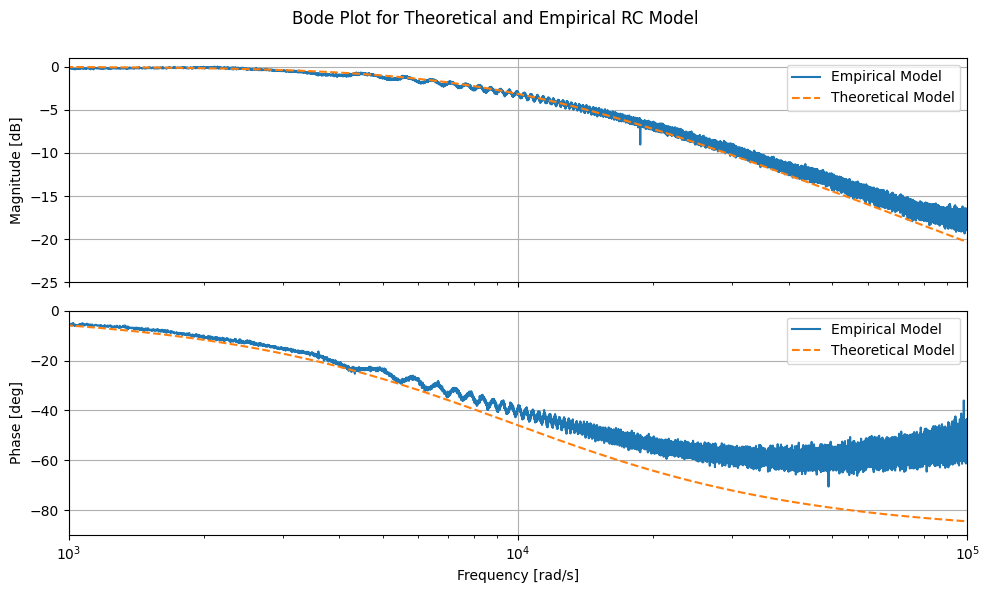

In [88]:
import matplotlib.pyplot as plt

# RC model
RC_chirp_fs = 1 / RC_chirp_data['Tinterval'][0]
RC_chirp_N = RC_chirp_data['Length'][0]
RC_chirp_H_amp_db, RC_chirp_H_phase_deg, RC_chirp_omega = frequency_response_fft(u=RC_chirp_u_signal, y=RC_chirp_y_signal,  # Experimental
                                                                             fs=RC_chirp_fs, N=RC_chirp_N)
RC_model_mag, RC_model_phase, RC_model_omega = ctrl.bode(G_s_RC, RC_chirp_omega, plot=False)                              # theoretical 
RC_model_H_amp_db = 20 * np.log10(np.abs(RC_model_mag) + 1e-13)
RC_model_H_phase_deg = RC_model_phase * (180 / np.pi)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(RC_chirp_omega, RC_chirp_H_amp_db, label='Empirical Model')
axes[0].semilogx(RC_model_omega, RC_model_H_amp_db, '--', label='Theoretical Model')
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_xlim((1e3, 1e5))
axes[0].set_ylim((-25, 1))
axes[0].grid()
axes[0].legend()

axes[1].semilogx(RC_chirp_omega, RC_chirp_H_phase_deg, label='Empirical Model')
axes[1].semilogx(RC_model_omega, RC_model_H_phase_deg, '--', label='Theoretical Model')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_ylabel("Phase [deg]")
axes[1].set_xlim((1e3, 1e5))
axes[1].set_ylim((-90, 0))
axes[1].grid()
axes[1].legend()

fig.suptitle('Bode Plot for Theoretical and Empirical RC Model')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



#### Bandwidth of RC Model

In [89]:
def plot_pass_filter(y_db, omega_hz, half_power, omega_x, omega_y, type='low'):
    x_min, x_max = omega_hz.min(), omega_hz.max()
    y_min, y_max = y_db.min(), y_db.max()

    plt.figure(figsize=(15, 6))

    plt.semilogx(omega_hz, y_db)
    plt.hlines(half_power, x_min, x_max, colors='r', linestyles='--', label='Half Power', alpha=0.4)
    if type == 'low':
        plt.scatter(omega_x[1], omega_y[1], c='r', label='Omega')
        plt.vlines(omega_x[1], y_min, omega_y[1], colors='r')
        plt.text(omega_x[1], omega_y[1]+0.4, f'omega_r\nf = {omega_x[1]:.2f}Hz')
        plt.text(x_max-10000, half_power+0.2, f'{half_power:.2f}dB')
        
        plt.annotate('',
                     xy=(omega_x[1], y_min+2),
                     xytext=(x_min, y_min+2),
                     arrowprops=dict(facecolor='black', arrowstyle='->', lw=1.5))
        plt.text(x_min+100, y_min+2.5, f'Passband: 0Hz -> {omega_x[1]:.2f}Hz')

    elif type == 'band':
        plt.scatter(omega_x, omega_y, c='r', label='Omega')
        plt.vlines(omega_x, y_min, omega_y, colors='r')
        plt.text(x_min + 1000, half_power+0.2, f'{half_power:.2f}dB')
        plt.text(omega_x[0], omega_y[0]+0.4, f'omega_r\nf = {omega_x[0]:.2f}Hz')
        plt.text(omega_x[1], omega_y[1]+0.4, f'omega_1\nf = {omega_x[1]:.2f}Hz')
        plt.text(omega_x[2], omega_y[2]+0.4, f'omega_2\nf = {omega_x[2]:.2f}Hz')

        plt.annotate('',
                     xy=(omega_x[1], y_min+2),
                     xytext=(omega_x[2], y_min+2),
                     arrowprops=dict(facecolor='black', arrowstyle='<->', lw=1.5))
        plt.text(omega_x[0], y_min+2.5, f'Passband: {omega_x[1]:.2f}Hz -> {omega_x[2]:.2f}Hz', ha='center')

    plt.xlabel('Frequency [Hz]')
    plt.ylabel("Magnitude [dB]")
    plt.grid()
    plt.xlim((x_min, x_max))
    plt.ylim((y_min, y_max + 0.3))
    plt.legend()

def pass_filter(y_db, omega_hz, type='low', plot=False):
    idx_max = y_db.argmax()
    amp_max = y_db[idx_max]

    half_power = amp_max - 3
    indices = np.where(y_db <= half_power)[0]

    if type == 'low':
        omega_r = None
        omega_1 = 0
        omega_2 = omega_hz[indices[0]]

        if plot:
            plot_pass_filter(y_db, omega_hz, half_power, [omega_1, omega_2], [0, y_db[indices[0]]], type='low')

    elif type == 'band':
        idx_omega_1 = indices[indices < idx_max][-1]
        idx_omega_2 = indices[indices > idx_max][0]

        omega_r = omega_hz[idx_max]
        omega_1 = omega_hz[idx_omega_1]
        omega_2 = omega_hz[idx_omega_2]

        if plot:
            plot_pass_filter(y_db, omega_hz, half_power, [omega_r, omega_1, omega_2], [y_db[idx_max],y_db[idx_omega_1], y_db[idx_omega_2]], type='band')
    
        
    return half_power, omega_r, omega_1, omega_2

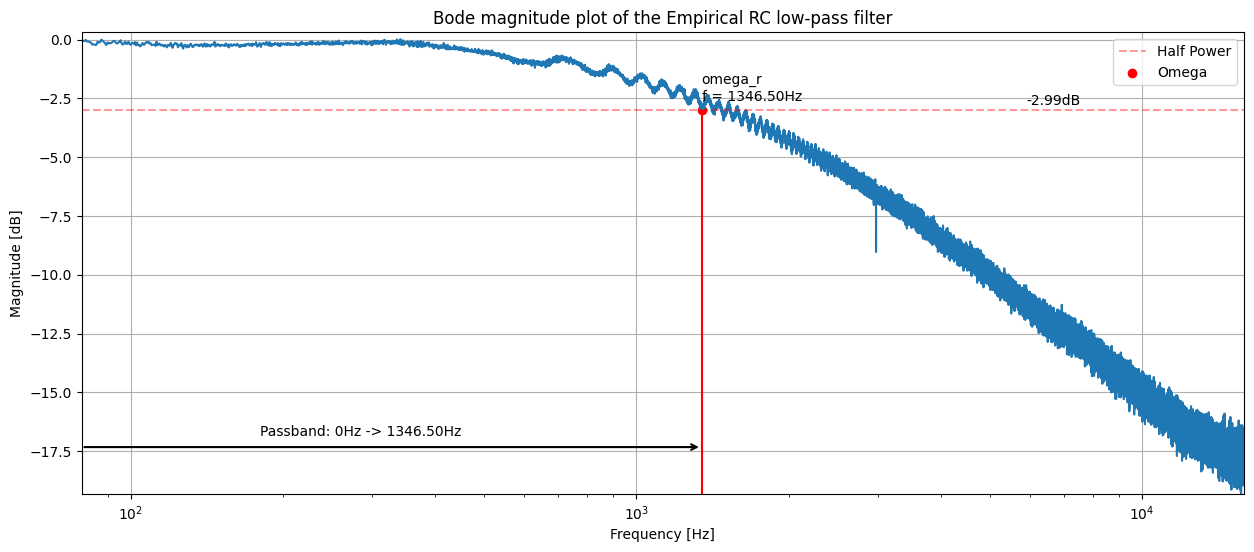

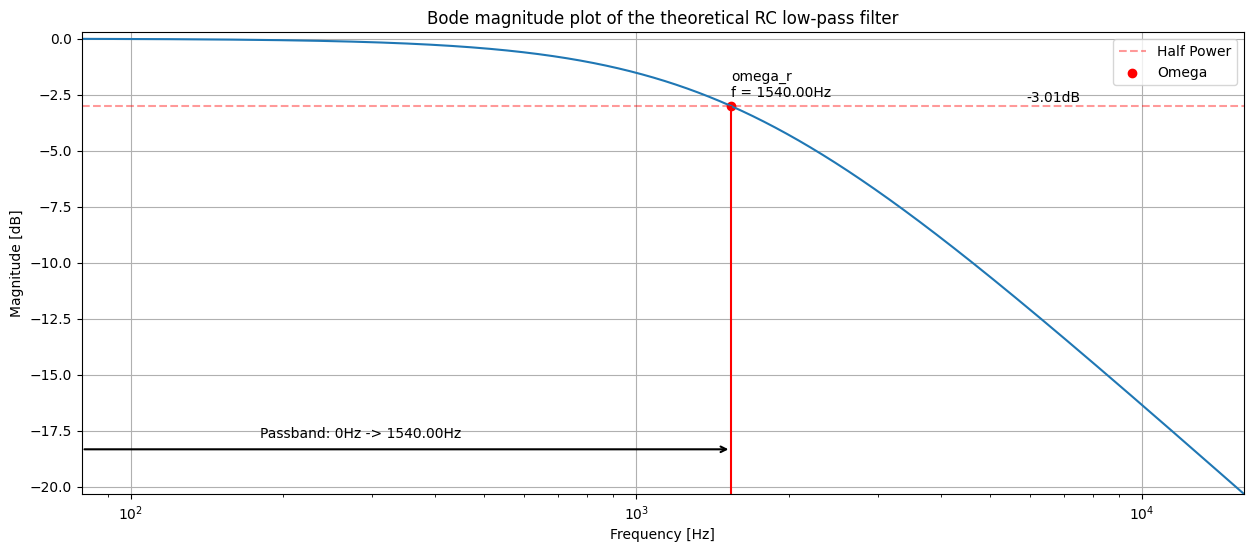

In [90]:
# Empirical RC Model
RC_range = [5e2, 1e5]
RC_range_mask = (RC_chirp_omega >= RC_range[0]) & (RC_chirp_omega <= RC_range[1])
RC_chirp_omega_hz = RC_chirp_omega[RC_range_mask] / (2*np.pi)

RC_half_power, _, _, RC_omega_2 = pass_filter(RC_chirp_H_amp_db[RC_range_mask], RC_chirp_omega_hz, plot=True)
plt.title('Bode magnitude plot of the Empirical RC low-pass filter')
plt.show()

# Theoretical RC Model
RC_model_range = [5e2, 1e5]
RC_model_range_mask = (RC_model_omega >= RC_model_range[0]) & (RC_model_omega <= RC_model_range[1])
RC_model_omega_hz = RC_model_omega[RC_model_range_mask] / (2*np.pi)

RC_model_half_power, _, _, RC_model_omega_2 = pass_filter(RC_model_H_amp_db[RC_model_range_mask], RC_model_omega_hz, plot=True)
plt.title('Bode magnitude plot of the theoretical RC low-pass filter')
plt.show()

#### RLC Model – Frequency Response to Chirp Signal

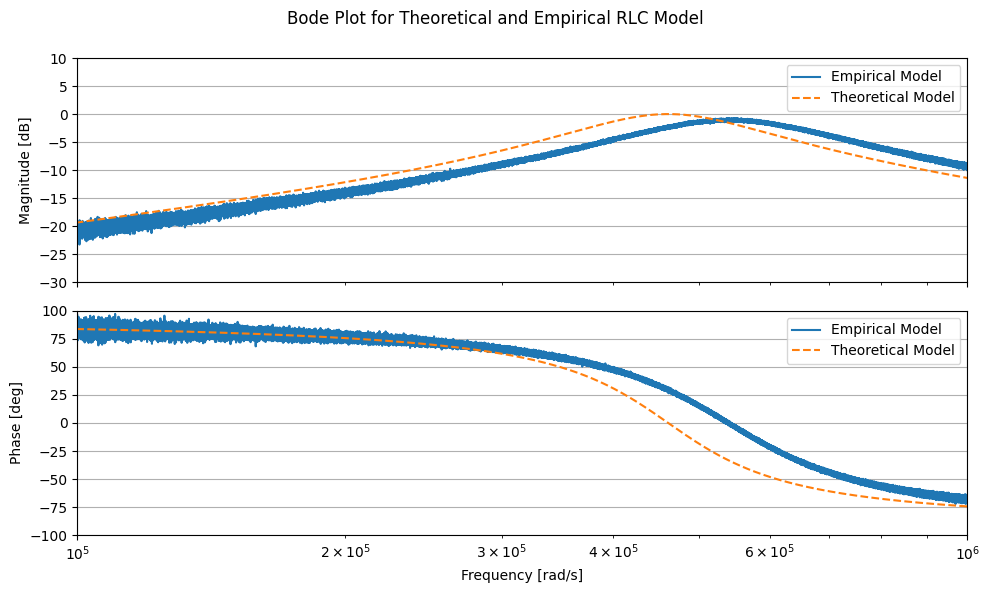

In [91]:
import matplotlib.pyplot as plt

# RLC model
RLC_chirp_fs = 1 / RLC_chirp_data['Tinterval'][0]
RLC_chirp_N = RLC_chirp_data['Length'][0]
RLC_chirp_H_amp_db, RLC_chirp_H_phase_deg, RLC_chirp_omega = frequency_response_fft(u=RLC_chirp_u_signal, y=RLC_chirp_y_signal,  # Experimental
                                                                             fs=RLC_chirp_fs, N=RLC_chirp_N)
RLC_model_mag, RLC_model_phase, RLC_model_omega = ctrl.bode(G_s_RLC, RLC_chirp_omega, plot=False)                              # theoretical 
RLC_model_H_amp_db = 20 * np.log10(np.abs(RLC_model_mag) + 1e-13)
RLC_model_H_phase_deg = RLC_model_phase * (180 / np.pi)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(RLC_chirp_omega, RLC_chirp_H_amp_db, label='Empirical Model')
axes[0].semilogx(RLC_model_omega, RLC_model_H_amp_db, '--', label='Theoretical Model')
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_xlim((1e5, 1e6))
axes[0].set_ylim((-30, 10))
axes[0].grid()
axes[0].legend()

axes[1].semilogx(RLC_chirp_omega, RLC_chirp_H_phase_deg, label='Empirical Model')
axes[1].semilogx(RLC_model_omega, RLC_model_H_phase_deg, '--', label='Theoretical Model')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_ylabel("Phase [deg]")
axes[1].set_xlim((1e5, 1e6))
axes[1].set_ylim((-100, 100))
axes[1].grid()
axes[1].legend()

fig.suptitle('Bode Plot for Theoretical and Empirical RLC Model')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



#### Bandwidth of RLC Model

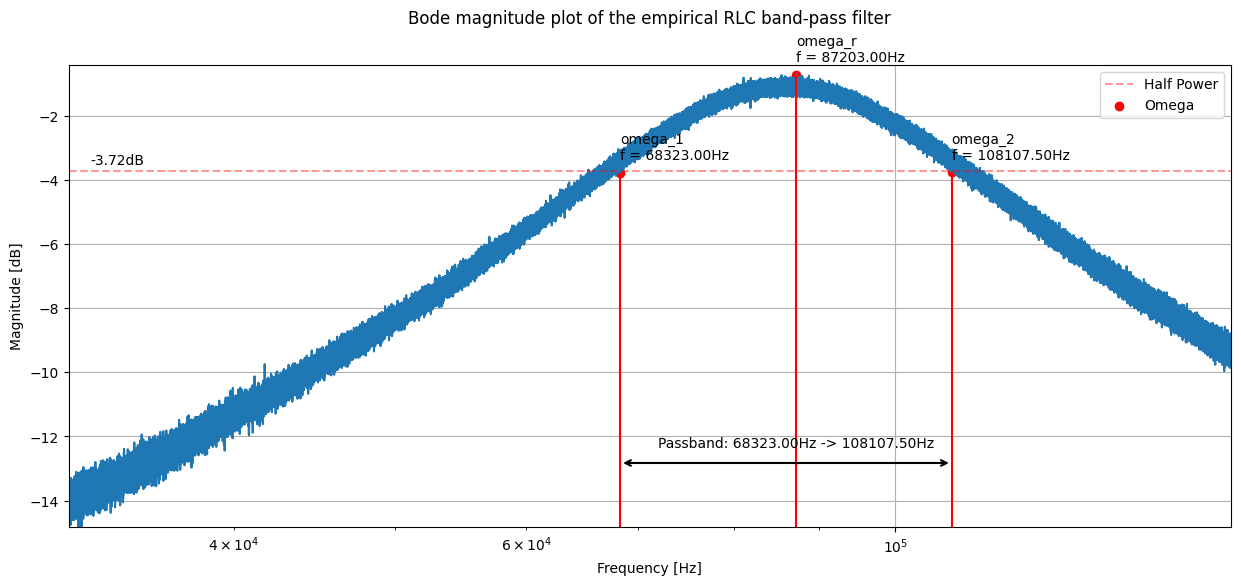

Damping factor for the Empirical Model: 0.22811428505900033


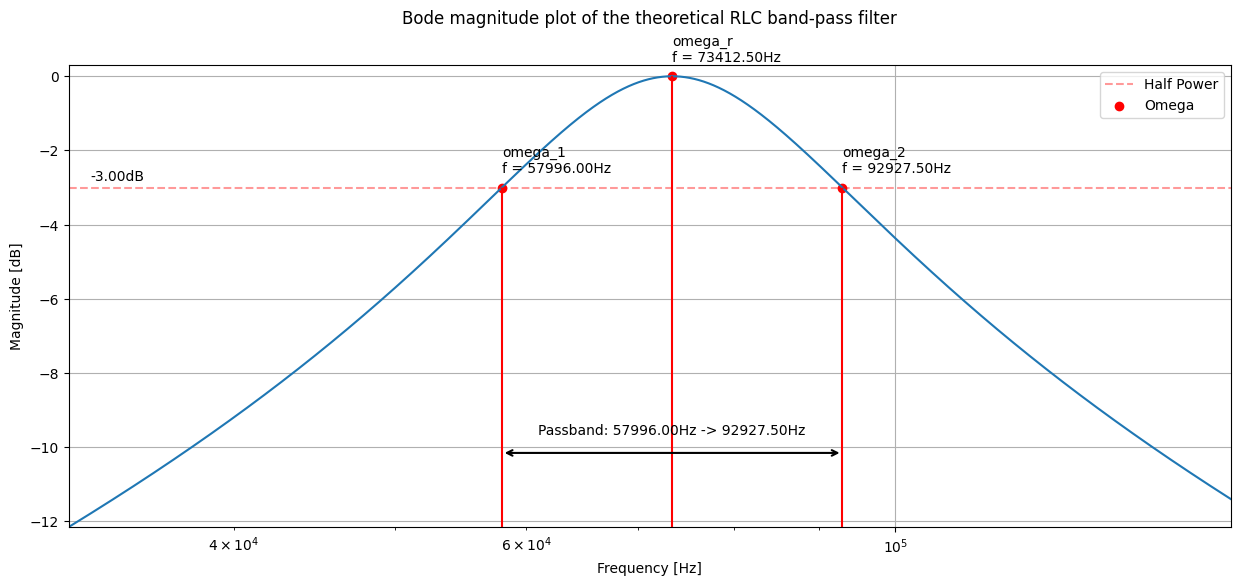

Damping factor for the Theoretical Model: 0.23791248084454278


In [92]:
# Empirical Model
RLC_range = [2e5, 1e6]
RLC_range_mask = (RLC_chirp_omega >= RLC_range[0]) & (RLC_chirp_omega <= RLC_range[1])
RLC_chirp_omega_hz = RLC_chirp_omega[RLC_range_mask] / (2*np.pi)

RLC_half_power, RLC_omega_r, RLC_omega_1, RLC_omega_2 = pass_filter(RLC_chirp_H_amp_db[RLC_range_mask], RLC_chirp_omega_hz, type='band', plot=True)
plt.title('Bode magnitude plot of the empirical RLC band-pass filter', pad=30)
plt.show()

epsilon = (RLC_omega_2-RLC_omega_1) / (2*RLC_omega_r)
print(f'Damping factor for the Empirical Model: {epsilon}')

# Theoretical Model
RLC_model_range = [2e5, 1e6]
RLC_model_range_mask = (RLC_model_omega >= RLC_model_range[0]) & (RLC_model_omega <= RLC_model_range[1])
RLC_model_omega_hz = RLC_model_omega[RLC_model_range_mask] / (2*np.pi)

RLC_model_half_power, RLC_model_omega_r, RLC_model_omega_1, RLC_model_omega_2 = pass_filter(RLC_model_H_amp_db[RLC_model_range_mask], RLC_model_omega_hz, type='band', plot=True)
plt.title('Bode magnitude plot of the theoretical RLC band-pass filter', pad=30)
plt.show()

epsilon = (RLC_model_omega_2-RLC_model_omega_1) / (2*RLC_model_omega_r)
print(f'Damping factor for the Theoretical Model: {epsilon}')

### Task 1.2

#### Operator Transmittance for the compensated model

In [93]:
R2_measured = 217
L2_optim = 0.83e-3    # Optimal value within tolerance +/-20%
R2L_optim = 25        # Optimal value
C2_measured = 4.1e-9

num = [R2_measured / L2_optim, 0]
denom = [1, (R2_measured+R2L_optim) / L2_optim, 1 / (C2_measured*L2_optim)]

G_s_RLC_comp = ctrl.TransferFunction(num, denom)  # Transmittance for the compensated model
print(G_s_RLC_comp)

<TransferFunction>: sys[31]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         2.614e+05 s
-----------------------------
s^2 + 2.916e+05 s + 2.939e+11



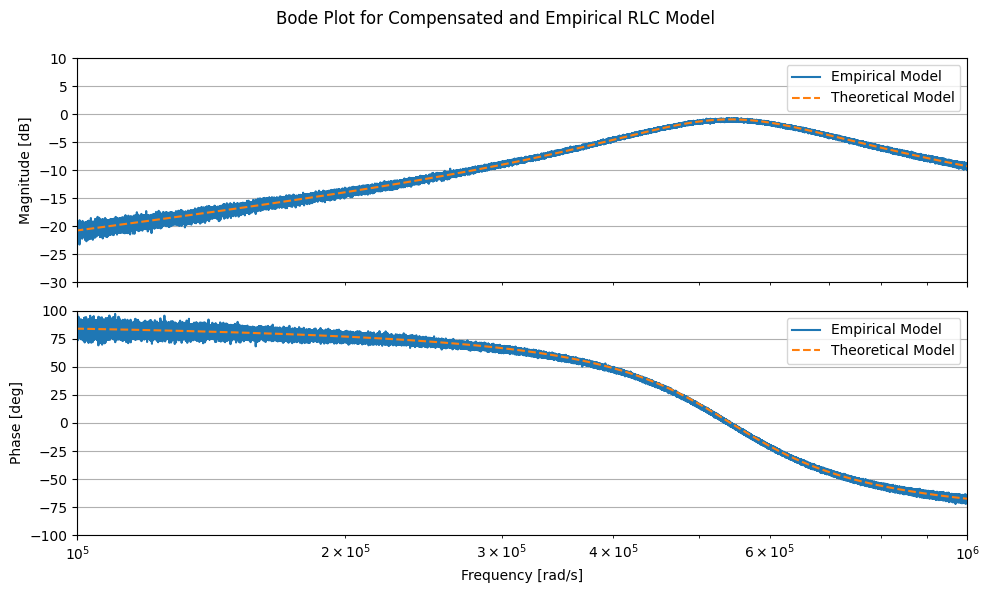

In [94]:
import matplotlib.pyplot as plt

# Compensated RLC Model
RLC_chirp_fs = 1 / RLC_chirp_data['Tinterval'][0]
RLC_chirp_N = RLC_chirp_data['Length'][0]
RLC_chirp_H_amp_db, RLC_chirp_H_phase_deg, RLC_chirp_omega = frequency_response_fft(u=RLC_chirp_u_signal, y=RLC_chirp_y_signal,  # Experimental
                                                                                fs=RLC_chirp_fs, N=RLC_chirp_N)
RLC_model_mag, RLC_model_phase, RLC_model_omega = ctrl.bode(G_s_RLC_comp, RLC_chirp_omega, plot=False)                              # theoretical 
RLC_model_H_amp_db = 20 * np.log10(np.abs(RLC_model_mag) + 1e-13)
RLC_model_H_phase_deg = RLC_model_phase * (180 / np.pi)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(RLC_chirp_omega, RLC_chirp_H_amp_db, label='Empirical Model')
axes[0].semilogx(RLC_model_omega, RLC_model_H_amp_db, '--', label='Theoretical Model')
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_xlim((1e5, 1e6))
axes[0].set_ylim((-30, 10))
axes[0].grid()
axes[0].legend()

axes[1].semilogx(RLC_chirp_omega, RLC_chirp_H_phase_deg, label='Empirical Model')
axes[1].semilogx(RLC_model_omega, RLC_model_H_phase_deg, '--', label='Theoretical Model')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_ylabel("Phase [deg]")
axes[1].set_xlim((1e5, 1e6))
axes[1].set_ylim((-100, 100))
axes[1].grid()
axes[1].legend()

fig.suptitle('Bode Plot for Compensated and Empirical RLC Model')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



## Exercise 2

### Estimate Frequency Response using Welch Periodogram for RLC Model

In [95]:
from scipy.signal import csd, welch

def tfestimate(u, y, fs, df):

    window = int(fs / df)
    overlap = int(window / 2)
    nfft = window

    f, Gxy = csd(u, y, fs=fs, nperseg=window, noverlap=overlap, nfft=nfft)
    _, Gxx = welch(u, fs=fs, nperseg=window, noverlap=overlap, nfft=nfft)

    H = Gxy / Gxx

    omega = 2 * np.pi * f

    H_amp_db = 20 * np.log10(np.abs(H))
    H_phase_deg = np.angle(H, deg=True)

    return H_amp_db, H_phase_deg, omega


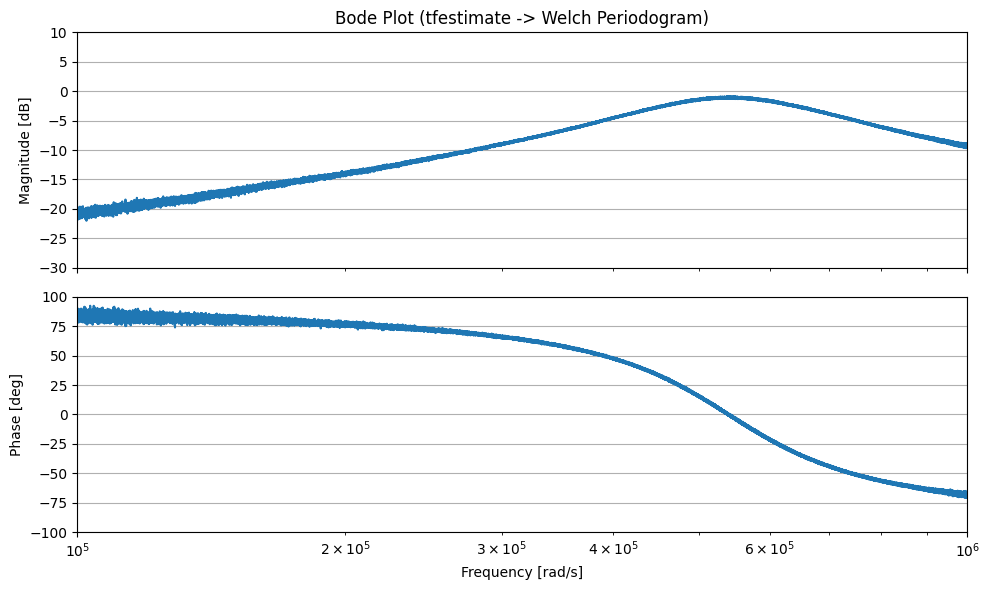

In [96]:
fs = 1 / RLC_chirp_data['Tinterval'][0]
df = 1  # Frequency resolution

magnitude_db, phase_deg, omega = tfestimate(RLC_chirp_u_signal, RLC_chirp_y_signal, fs, df)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(omega, magnitude_db)
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_title('Bode Plot (tfestimate -> Welch Periodogram)')
axes[0].set_xlim((1e5, 1e6))
axes[0].set_ylim((-30, 10))
axes[0].grid()

axes[1].semilogx(omega, phase_deg)
axes[1].set_ylabel('Phase [deg]')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_xlim((1e5, 1e6))
axes[1].set_ylim((-100, 100))
axes[1].grid()

plt.tight_layout()
plt.show()


## Exercise 3

### Task 3.1

#### Load and preprocess noise data

In [97]:
NOISE1_DATA_PATH = DATA_DIR / '20210305-RC_SzumBand200kHz_T2s.csv'
NOISE2_DATA_PATH = DATA_DIR / '20220401-RLC_SzumBand500kHz_T2.csv'

RC_noise_data = pd.read_csv(NOISE1_DATA_PATH)
RLC_noise_data = pd.read_csv(NOISE2_DATA_PATH)

RC_noise_data = preprocess_data(RC_noise_data)
RC_noise_y_signal = RC_noise_data['OutputSignalY']
RC_noise_u_signal = RC_noise_data['InputSignalU']
RC_noise_t = create_time_vector(RC_noise_data)

RLC_noise_data = preprocess_data(RLC_noise_data)
RLC_noise_y_signal = RLC_noise_data['OutputSignalY']
RLC_noise_u_signal = RLC_noise_data['InputSignalU']
RLC_noise_t = create_time_vector(RLC_noise_data)

RC_noise_data

C:\Users\miki0\AppData\Local\Temp\ipykernel_16852\1002384180.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  RC_noise_data = pd.read_csv(NOISE1_DATA_PATH)
C:\Users\miki0\AppData\Local\Temp\ipykernel_16852\1002384180.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  RLC_noise_data = pd.read_csv(NOISE2_DATA_PATH)


,OutputSignalY,InputSignalU,Tstart,Tinterval,Length
0,-0.014460,-0.035737,-0.000002,1.000000e-06,1999999.0
1,-0.001825,0.196387,NaN,NaN,NaN
2,0.012604,0.374950,NaN,NaN,NaN
3,0.012604,0.276742,NaN,NaN,NaN
4,-0.001825,0.026765,NaN,NaN,NaN
...,...,...,...,...,...
1999994,0.059523,0.142796,NaN,NaN,NaN
1999995,0.052303,0.017823,NaN,NaN,NaN
1999996,0.045088,-0.080386,NaN,NaN,NaN
1999997,0.043281,-0.062532,NaN,NaN,NaN


#### RC Model – Frequency Response to Noise Signal (FFT Method)

c:\Users\miki0\Desktop\Projects\model_ident\myenv\lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(
C:\Users\miki0\AppData\Local\Temp\ipykernel_16852\1769970342.py:32: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\miki0\Desktop\Projects\model_ident\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


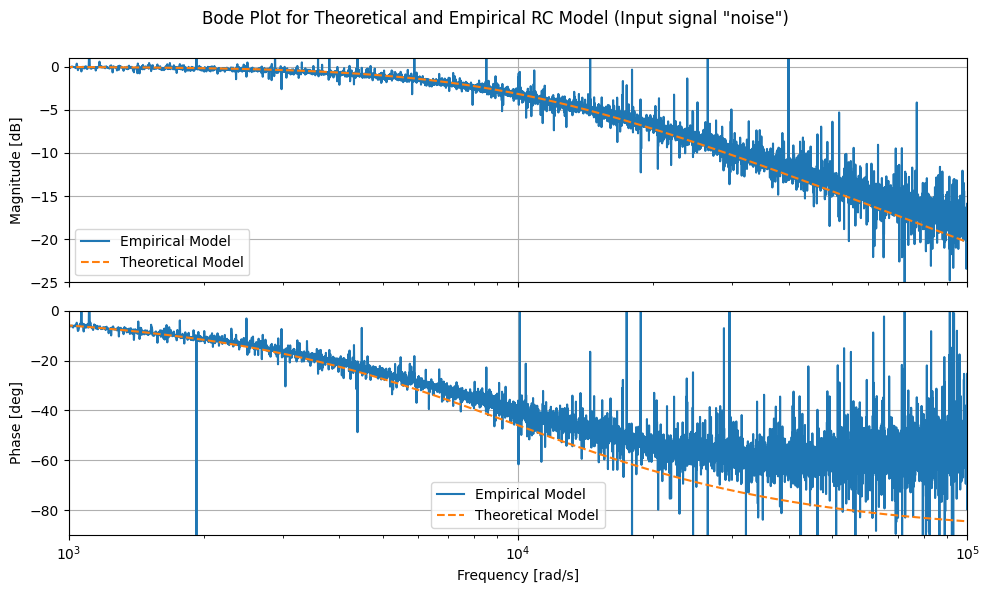

In [98]:
import matplotlib.pyplot as plt

# RC model (Input signal "noise")
RC_noise_fs = 1 / RC_noise_data['Tinterval'][0]
RC_noise_N = RC_noise_data['Length'][0]
RC_noise_H_amp_db, RC_noise_H_phase_deg, RC_noise_omega = frequency_response_fft(u=RC_noise_u_signal, y=RC_noise_y_signal,  # Experimental
                                                                             fs=RC_noise_fs, N=RC_noise_N)
RC_model_mag, RC_model_phase, RC_model_omega = ctrl.bode(G_s_RC, RC_noise_omega, plot=False)                              # theoretical 
RC_model_H_amp_db = 20 * np.log10(np.abs(RC_model_mag) + 1e-13)
RC_model_H_phase_deg = RC_model_phase * (180 / np.pi)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(RC_noise_omega, RC_noise_H_amp_db, label='Empirical Model')
axes[0].semilogx(RC_model_omega, RC_model_H_amp_db, '--', label='Theoretical Model')
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_xlim((1e3, 1e5))
axes[0].set_ylim((-25, 1))
axes[0].grid()
axes[0].legend()

axes[1].semilogx(RC_noise_omega, RC_noise_H_phase_deg, label='Empirical Model')
axes[1].semilogx(RC_model_omega, RC_model_H_phase_deg, '--', label='Theoretical Model')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_ylabel("Phase [deg]")
axes[1].set_xlim((1e3, 1e5))
axes[1].set_ylim((-90, 0))
axes[1].grid()
axes[1].legend()

fig.suptitle('Bode Plot for Theoretical and Empirical RC Model (Input signal "noise")')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



#### RLC Model – Frequency Response to Noise Signal (FFT Method)

C:\Users\miki0\AppData\Local\Temp\ipykernel_16852\2633492540.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


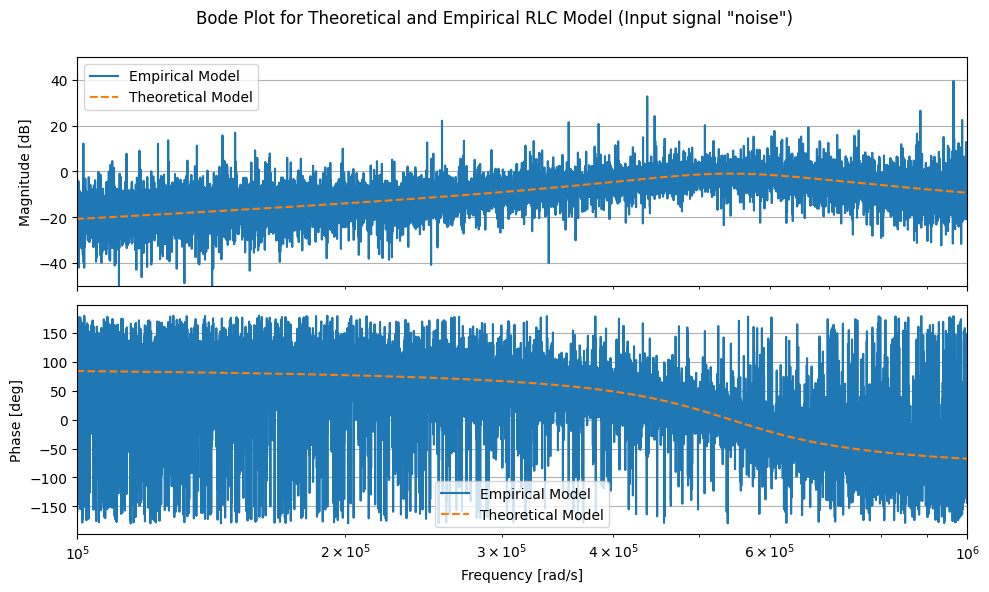

In [99]:
import matplotlib.pyplot as plt

# RLC model (Input signal "noise")
RLC_noise_fs = 1 / RLC_noise_data['Tinterval'][0]
RLC_noise_N = RLC_noise_data['Length'][0]
RLC_noise_H_amp_db, RLC_noise_H_phase_deg, RLC_noise_omega = frequency_response_fft(u=RLC_noise_u_signal, y=RLC_noise_y_signal,  # Experimental
                                                                                fs=RLC_noise_fs, N=RLC_noise_N)
RLC_model_mag, RLC_model_phase, RLC_model_omega = ctrl.bode(G_s_RLC_comp, RLC_noise_omega, plot=False)                              # theoretical 
RLC_model_H_amp_db = 20 * np.log10(np.abs(RLC_model_mag) + 1e-13)
RLC_model_H_phase_deg = RLC_model_phase * (180 / np.pi)

fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].semilogx(RLC_noise_omega, RLC_noise_H_amp_db, label='Empirical Model')
axes[0].semilogx(RLC_model_omega, RLC_model_H_amp_db, '--', label='Theoretical Model')
axes[0].set_ylabel('Magnitude [dB]')
axes[0].set_xlim((1e5, 1e6))
axes[0].set_ylim((-50, 50))
axes[0].grid()
axes[0].legend()

axes[1].semilogx(RLC_noise_omega, RLC_noise_H_phase_deg, label='Empirical Model')
axes[1].semilogx(RLC_model_omega, RLC_model_H_phase_deg, '--', label='Theoretical Model')
axes[1].set_xlabel('Frequency [rad/s]')
axes[1].set_ylabel("Phase [deg]")
axes[1].set_xlim((1e5, 1e6))
axes[1].grid()
axes[1].legend()

fig.suptitle('Bode Plot for Theoretical and Empirical RLC Model (Input signal "noise")')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()



### Task 3.2

#### RC Model – Estimated Frequency Response to Noise Signal (Welch Periodogram) with differents value of df

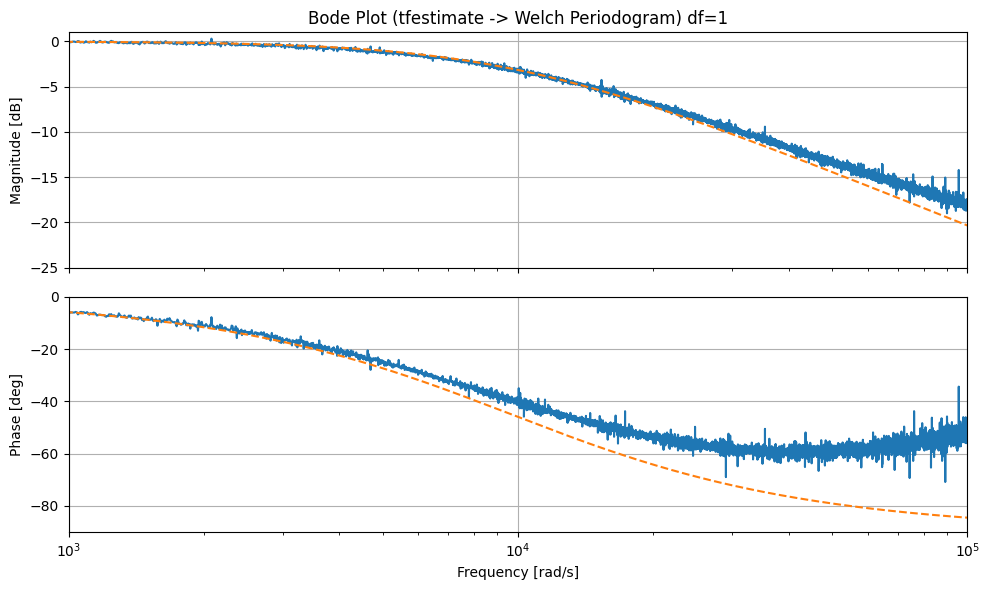

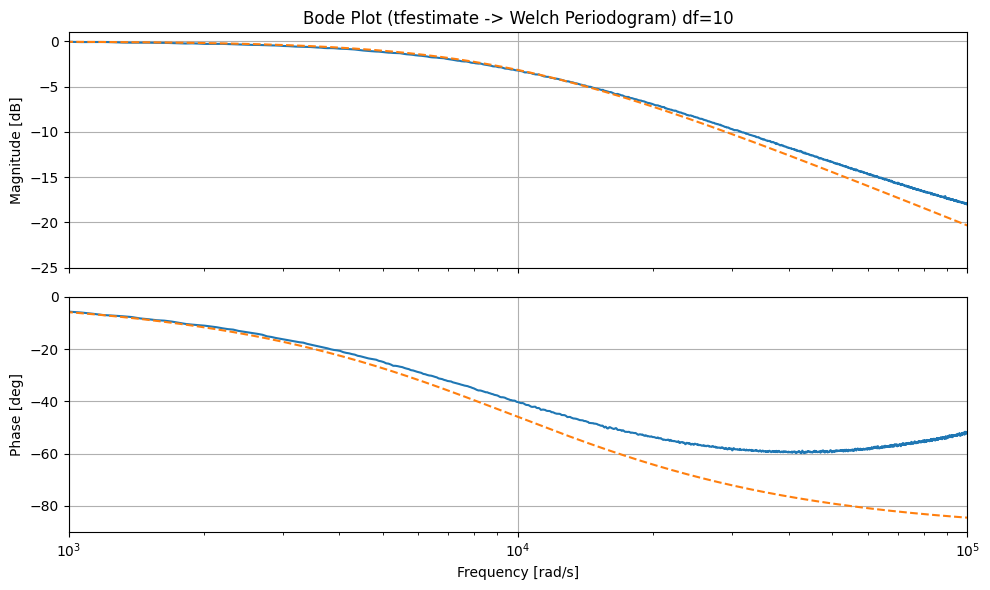

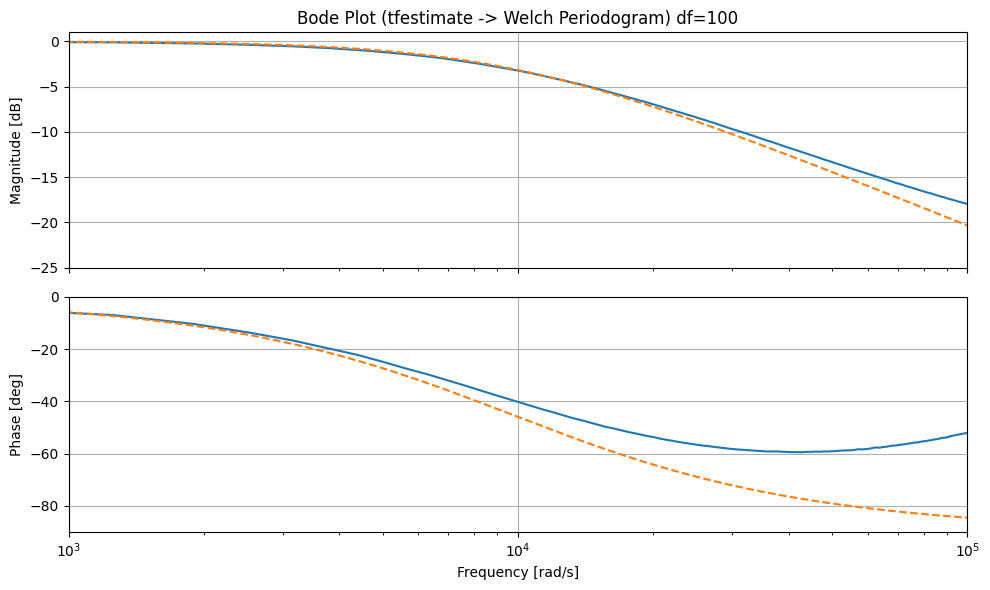

In [100]:
fs = 1 / RC_noise_data['Tinterval'][0]
df_l = [1, 10, 100]  # List of frequency resolutions

amp_phase_omega = [tfestimate(RC_noise_u_signal, RC_noise_y_signal, fs, df) for df in df_l]

for idx, (magnitude_db, phase_deg, omega) in enumerate(amp_phase_omega):
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    axes[0].semilogx(omega, magnitude_db, label='Empirical Model')
    axes[0].semilogx(RC_model_omega, RC_model_H_amp_db, '--', label='Theoretical Model')
    axes[0].set_ylabel('Magnitude [dB]')
    axes[0].set_title(f'Bode Plot (tfestimate -> Welch Periodogram) df={df_l[idx]}')
    axes[0].set_xlim((1e3, 1e5))
    axes[0].set_ylim((-25, 1))
    axes[0].grid()

    axes[1].semilogx(omega, phase_deg, label='Empirical Model')
    axes[1].semilogx(RC_model_omega, RC_model_H_phase_deg, '--', label='Theoretical Model')
    axes[1].set_ylabel('Phase [deg]')
    axes[1].set_xlabel('Frequency [rad/s]')
    axes[1].set_xlim((1e3, 1e5))
    axes[1].set_ylim((-90, 0))
    axes[1].grid()

    plt.tight_layout()
    plt.show()


#### RLC Model – Estimated Frequency Response to Noise Signal (Welch Periodogram) with differents value of df

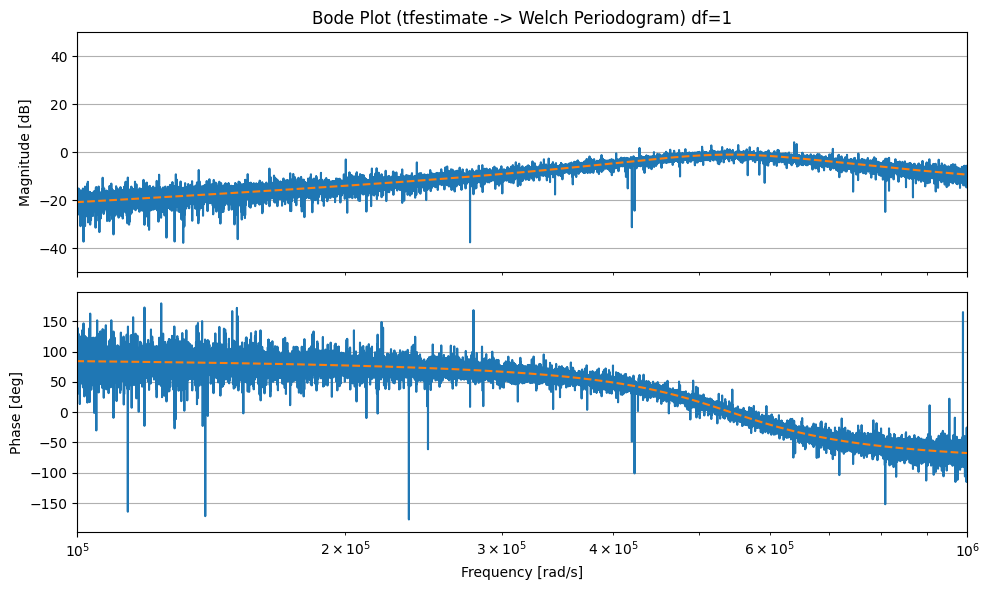

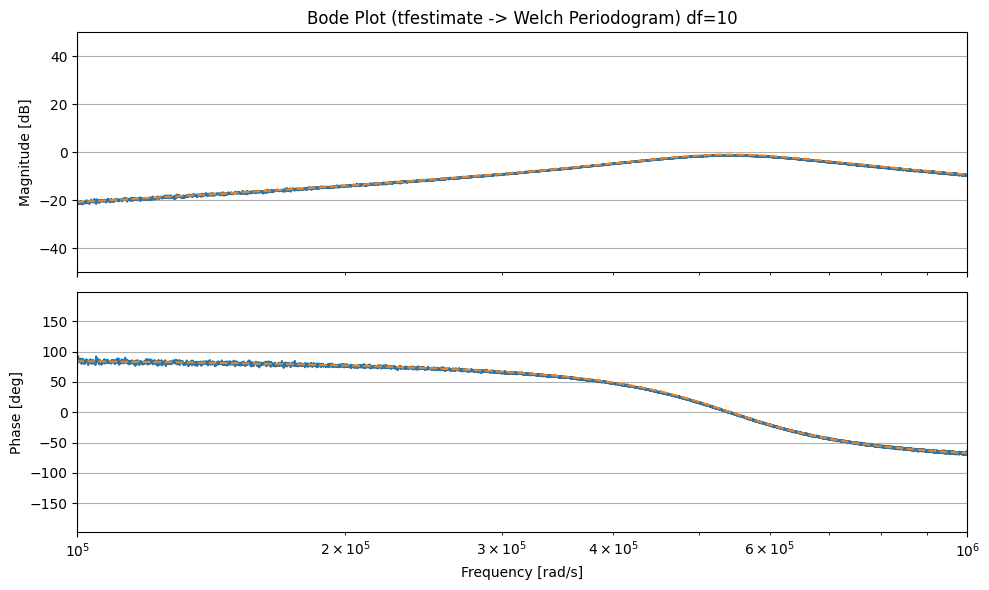

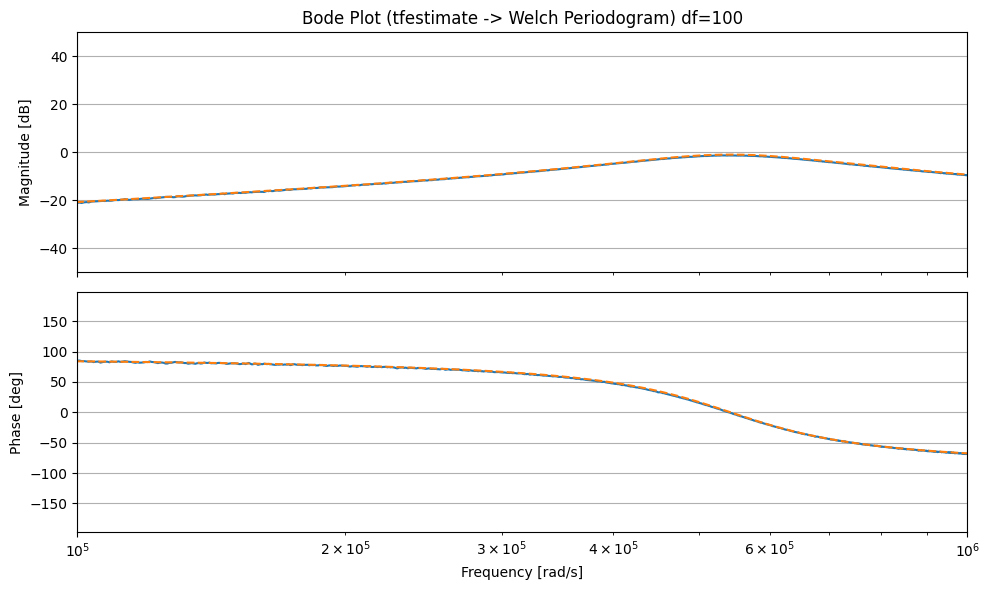

In [101]:
fs = 1 / RLC_noise_data['Tinterval'][0]
df_l = [1, 10, 100]  # List of frequency resolutions

amp_phase_omega = [tfestimate(RLC_noise_u_signal, RLC_noise_y_signal, fs, df) for df in df_l]

for idx, (magnitude_db, phase_deg, omega) in enumerate(amp_phase_omega):
    fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    axes[0].semilogx(omega, magnitude_db, label='Empirical Model')
    axes[0].semilogx(RLC_model_omega, RLC_model_H_amp_db, '--', label='Theoretical Model')
    axes[0].set_ylabel('Magnitude [dB]')
    axes[0].set_title(f'Bode Plot (tfestimate -> Welch Periodogram) df={df_l[idx]}')
    axes[0].set_xlim((1e5, 1e6))
    axes[0].set_ylim((-50, 50))
    axes[0].grid()

    axes[1].semilogx(omega, phase_deg, label='Empirical Model')
    axes[1].semilogx(RLC_model_omega, RLC_model_H_phase_deg, '--', label='Theoretical Model')
    axes[1].set_ylabel('Phase [deg]')
    axes[1].set_xlabel('Frequency [rad/s]')
    axes[0].set_xlim((1e5, 1e6))
    axes[1].grid()

    plt.tight_layout()
    plt.show()
